# Project 1: World Development Statistics

![Crumbl cookie logo](Crumbl.png)

---
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

**Business Context:**

Crumbl Cookies is a family owned cookie company that was started by cousins Jason McGowan (CEO) and Sawyer Hemsley (COO). It was started in Logan, Utah, USA in 2017. In the seven years since its inception it has had tremendous success franchising in the US. They recently opened their 1000th location. They have grown so quickly, they've been dubbed the fasted growing dessert company in the United States.

They are looking to the future and their goal is to grow internationally. As one of their data scientists, they would like recommendations for viable markets outside the United States with an emphasis on populations that would support growth and expansion, robust economies, daily incomes and, most importantly, sugar intake. They are a cookie company after all. With international growth in mind, we are looking to answer the question of which country will offer the opportunity for continued growth.


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Data Dictionary:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**gdp**|*float*|Year 2024| Predicted Gross Domestic Product per person adjusted for differences in perchase power in international dollars
|**population**|*float*|Year 2024|The population of Australia, Brazil, Canada, Denmark, Ireland, Japan, Mexico, Netherlands, New Zealand, Norway, Singapor, Switzerland, United Kingdom, United Stats (Predicted population expected).|
|**income**|*float*|Year 2024|The average daily income per capital|
|**sugar**|*float*|Year 2018|The most recent data on quantity of comsumption of sugar and sweetners in grams per person per day.|

### Outside Research

In my slide presentation I reference that Crumbl Cookies is the fastest growing dessert company in the United States. That reference is per the New York Times post found here (https://www.nytimes.com/2023/04/17/dining/crumbl-cookies.html#:~:text=Crumbl%20is%20the%20fastest%2Dgrowing,stores%20from%20coast%20to%20coast.)

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [113]:
# Create a function that calculates the mean of a given list of numbers
def mean(num_list): # Parameter
    """
    This function adds each item in the list together & 
    then divides it by the len of the list
    """
    return sum(num_list)/len(num_list)

# list for the function 
num_list = [1,2,3,4,5] #Argument
# Call to function
results = mean(num_list)
print(results)

3.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [114]:
# create a function that calls to the mean function above to calculate standard deviation

def std(num_list): # parameter
    """
    This function calculates the std by calling to the previous mean function, 
    then iterating over the list of numbers, calculating the squared differences
    by taking the num - call to the last function squared, then adding each squared
    difference into a variable. Then calculating the std by taking the sum of the
    squared differences and dividing it by the length of the num_list. You then multiply
    by 0.5
    
    Argument: num_list
    
    Returns the standard deviation
    
    """
    # calculate mean by calling mean function
    mean_list = mean(num_list)
    
    # create a variable to hold the squared differences
    sum_squared_diff = 0
    
    # Iterate over the num_list
    for num in num_list:
        # calculate the sqr diff for each value
        squared_difference = (num - mean_list)**2
        # add the values to sum_sqr_diff
        sum_squared_diff += squared_difference
        #Calculate std
        stand_dev = (sum_squared_diff / len(num_list))**0.5
    return stand_dev
 
# accuracy check
num_list = [5,6,7,8] # argument
# call the function
std_of_list = std(num_list)
print(std_of_list)

1.118033988749895


3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [115]:
def clean_number(num_str):
    if 'M' in num_str:
        return int(num_str.replace('M', '')) * 1000000
    elif 'K' in num_str:
        return int(num_str.replace('K', '')) * 1000
    else:
        return int(num_str)

# Test the function
print(clean_number('5M'))
print(clean_number('45K'))
print(clean_number('10'))

5000000
45000
10


---
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [116]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Data Import and Cleaning

### Data Import & Cleaning

In [117]:
# Project datasets
gdp = pd.read_csv("gni_per_cap_atlas_method_con2021.csv")
population = pd.read_csv("population.csv")
income = pd.read_csv("mincpcap_cppp.csv")
sugar = pd.read_csv("sugar_per_person_g_per_day.csv")

### GDP Initial analysis

In [118]:
# remove all columns except country and 2024
#gdp = gdp.loc[:, (gdp.columns.isin(['country'])) | (gdp.columns == "2024")]
gdp = gdp.loc[:, ['country', '2024']]

In [119]:
# remove all spaces before or after the country names (Canada, United States, I'm looking at you!)
for i in range(len(gdp['country'])):
    gdp['country'][i] = gdp['country'][i].strip()

In [120]:
# eleminate all "country" values not equal to Australia, Brazil, Mexico, United Kingdom, Singapore, Ireland, Switzerland, Denmark, Japan, Netherlands, Canada, USA
gdp = gdp[gdp['country'].isin(['Australia', 'Brazil', 'Mexico', 'United Kingdom', 'Singapore', 'Ireland', 'Switzerland', 'Denmark', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Canada', 'United States'])]

In [121]:
# change the value United Kingdom in the country column to UK to match other datasets
# change United States to USA to match other datasets
gdp['country'].replace('United Kingdom', 'UK', inplace=True)
gdp['country'].replace('United States', 'USA', inplace=True)

In [122]:
# I know this is ugly**2 , but I spent 3 days trying to get my function to work
# and never figured it out
# DISCLOSURE: Inspiration to use the lambda and float(str) conversion came from Alex the Analyst on YouTube

# # List of columns to convert
columns_to_convert = ['2024']
# Loop over each column and convert it
for column in columns_to_convert:
    gdp[column] = gdp[column].apply(lambda x: float(str(x).replace('k', '')) * 1000)

In [123]:
gdp.head()

,country,2024
7,Australia,58400.000
22,Brazil,8490000.000
28,Canada,47700.000
29,Switzerland,86500.000
46,Denmark,68200.000


In [124]:
# checking for duplicate values
gdp.duplicated().sum()

0

In [125]:
# checking missing values
gdp.isnull().sum()

country    0
2024       0
dtype: int64

In [126]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 7 to 180
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  14 non-null     object 
 1   2024     14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


In [127]:
# number of rows & columns
print(f"The GDP dataset has {gdp.shape[0]} rows and {gdp.shape[1]} columns.")

The GDP dataset has 14 rows and 2 columns.


In [128]:
# country names
gdp['country'].unique()

array(['Australia', 'Brazil', 'Canada', 'Switzerland', 'Denmark', 'UK',
       'Ireland', 'Japan', 'Mexico', 'Netherlands', 'Norway',
       'New Zealand', 'Singapore', 'USA'], dtype=object)

In [129]:
gdp.describe().T

,count,mean,std,min,25%,50%,75%,max
2024,14.000,1318728.571,3198255.701,44300.000,49700.000,64100.000,83275.000,9230000.000


In [130]:
# remane 2024 column
gdp.rename(columns= {'2024': "gdp"}, inplace= True)

In [131]:
gdp.head()

,country,gdp
7,Australia,58400.000
22,Brazil,8490000.000
28,Canada,47700.000
29,Switzerland,86500.000
46,Denmark,68200.000


In [132]:
# Get the values of the gdp column
gdp['gdp'].value_counts()

gdp
44800.000      2
58400.000      1
8490000.000    1
47700.000      1
86500.000      1
68200.000      1
73600.000      1
44300.000      1
9230000.000    1
55700.000      1
86700.000      1
60000.000      1
71500.000      1
Name: count, dtype: int64

In [133]:
# group the gdp and country columns and get the value counts
gdp.groupby(['gdp', 'country']).size().reset_index(name='count')

,gdp,country,count
0,44300.000,Japan,1
1,44800.000,New Zealand,1
2,44800.000,UK,1
3,47700.000,Canada,1
4,55700.000,Netherlands,1
5,58400.000,Australia,1
6,60000.000,Singapore,1
7,68200.000,Denmark,1
8,71500.000,USA,1
9,73600.000,Ireland,1


In [134]:
# get the mean of gdp an
gdp.groupby('country')['gdp'].mean()

country
Australia       58400.000
Brazil        8490000.000
Canada          47700.000
Denmark         68200.000
Ireland         73600.000
Japan           44300.000
Mexico        9230000.000
Netherlands     55700.000
New Zealand     44800.000
Norway          86700.000
Singapore       60000.000
Switzerland     86500.000
UK              44800.000
USA             71500.000
Name: gdp, dtype: float64

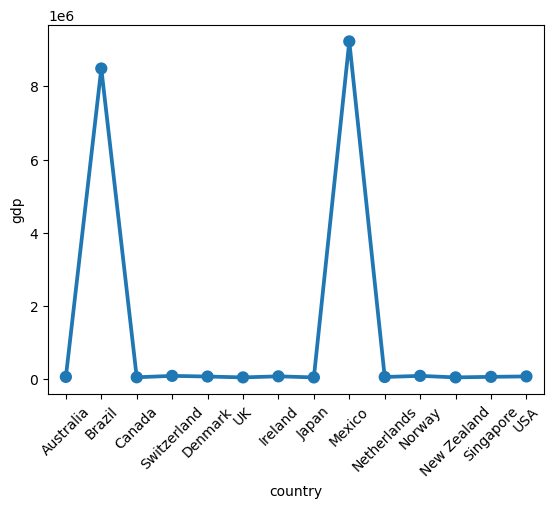

In [135]:
# Let's take a peak
sns.pointplot(gdp, x= "country", y ="gdp")
plt.xticks(rotation = 45);

### Population Initial analysis

In [136]:
# remove all columns except country and 2024
population = population.loc[:, ['country', '2024']]

In [137]:
# eleminate all "country" values not equal to Australia, Brazil, Mexico, United Kingdom, Singapore, Ireland, switzerland, denmark, japan and netherlands
population = population[population['country'].isin(['Australia', 'Brazil', 'Mexico', 'United Kingdom', 'Singapore', 'Ireland', 'Switzerland', 'Denmark', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Canada', 'United States'])]

In [138]:
# change the value United Kingdom in the country column to UK to match other datasets
# change United States to USA to match other datasets
population['country'].replace('United Kingdom', 'UK', inplace=True)
population['country'].replace('United States', 'USA', inplace=True)

In [139]:
# attempting to strip white space to see if it fixes
population['country'] = population['country'].str.strip()

In [140]:
# List of columns to convert
columns_to_convert = ['2024']
# Loop over each column and convert it
for column in columns_to_convert:
    #population[column] = population[column].apply(lambda x: float(str(x).replace('k', '').replace('M', '')) * 1000000)
    population[column] = [float(str(x).replace('k', '').replace('M', '')) * 1000 if 'k' in str(x) else float(str(x).replace('M', '')) * 1000000 for x in population[column]]

population.head()

,country,2024
8,Australia,26700000.000
23,Brazil,218000000.000
29,Canada,39100000.000
30,Switzerland,8850000.000
47,Denmark,5940000.000


In [141]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 8 to 186
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  14 non-null     object 
 1   2024     14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


In [142]:
population.dtypes.value_counts()

object     1
float64    1
Name: count, dtype: int64

In [143]:
# number of rows & columns
print(f"The Poplulation dataset has {population.shape[0]} rows and {population.shape[1]} columns.")

The Poplulation dataset has 14 rows and 2 columns.


In [144]:
# checking for duplicate values
population.duplicated().sum()

0

In [145]:
# checking missing values
population.isnull().sum()

country    0
2024       0
dtype: int64

In [146]:
# remane 2024 column
population.rename(columns= {'2024': "population"}, inplace= True)
population.head()

,country,population
8,Australia,26700000.000
23,Brazil,218000000.000
29,Canada,39100000.000
30,Switzerland,8850000.000
47,Denmark,5940000.000


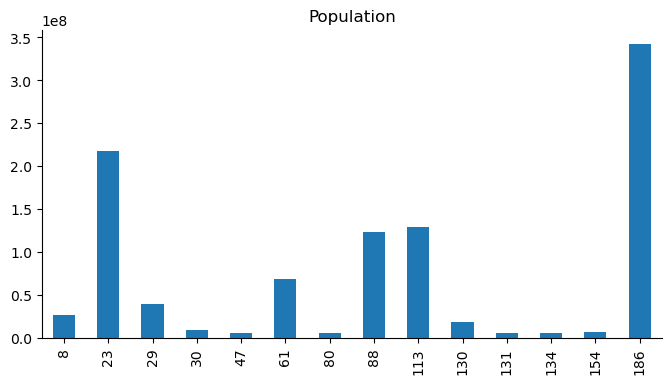

In [147]:
# Let's take a peak at population
population['population'].plot(kind='bar', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

### Average daily income initial analysis

In [148]:
# remove all columns except country and 2024
income = income.loc[:, ['country', '2024']]

In [149]:
# remove all spaces before or after the country names (Canada, United States, I'm looking at you!)
# attempting to strip white space to see if it fixes
income['country'] = income['country'].str.strip()

In [150]:
# eleminate all "country" values not equal to Australia, Brazil, Mexico, United Kingdom, Singapore, Ireland, switzerland, denmark, japan and netherlands
income = income[income['country'].isin(['Australia', 'Brazil', 'Mexico', 'UK', 'Singapore', 'Ireland', 'Switzerland', 'Denmark', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Canada', 'USA'])]

In [151]:
income.head()

,country,2024
8,Australia,67.500
23,Brazil,20.300
29,Canada,64.900
30,Switzerland,79.500
47,Denmark,71.100


In [152]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 8 to 184
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  14 non-null     object 
 1   2024     14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


In [153]:
income.dtypes.value_counts()

object     1
float64    1
Name: count, dtype: int64

In [154]:
# number of rows & columns
print(f"The Average Daily Income dataset has {income.shape[0]} rows and {income.shape[1]} columns.")

The Average Daily Income dataset has 14 rows and 2 columns.


In [155]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
2024,14.000,66.064,28.498,15.400,56.225,68.650,77.625,131.000


In [156]:
# checking missing values
income.isnull().sum()

country    0
2024       0
dtype: int64

In [157]:
income.duplicated().sum()

0

In [158]:
# remane 2024 column
income.rename(columns= {'2024': "income"}, inplace= True)
income.head()

,country,income
8,Australia,67.500
23,Brazil,20.300
29,Canada,64.900
30,Switzerland,79.500
47,Denmark,71.100


### Daily sugar consumption initial analysis

In [159]:
# eleminate all "country" values not equal to Australia, Brazil, Mexico, United Kingdom, Singapore, Ireland, switzerland, denmark, japan and netherlands
sugar = sugar[sugar['country'].isin(['Australia', 'Brazil', 'Mexico', 'United Kingdom', 'Singapore', 'Ireland', 'Switzerland', 'Denmark', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Canada', 'USA'])]

In [160]:
sugar['country'].replace('United Kingdom', 'UK', inplace=True)

In [161]:
# remove all columns except country and the last
sugar = sugar.loc[:, ['country', '2018']]
sugar.head(14)

,country,2018
8,Australia,158.000
22,Brazil,117.000
27,Canada,250.000
28,Switzerland,133.000
44,Denmark,154.000
73,Ireland,228.000
81,Japan,71.200
104,Mexico,128.000
121,Netherlands,99.700
122,Norway,115.000


In [162]:
# remane 2024 column
sugar.rename(columns= {'2018': "sugar"}, inplace= True)
sugar.head()

,country,sugar
8,Australia,158.000
22,Brazil,117.000
27,Canada,250.000
28,Switzerland,133.000
44,Denmark,154.000


In [163]:
sugar.describe().T

,count,mean,std,min,25%,50%,75%,max
sugar,12.000,148.908,51.080,71.200,116.500,143.500,162.500,250.000


In [164]:
# checking missing values
sugar.isnull().sum()

country    0
sugar      0
dtype: int64

In [165]:
sugar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 8 to 166
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  12 non-null     object 
 1   sugar    12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


In [166]:
# checking for duplicate values
sugar.duplicated().sum()

0

In [167]:
# country names
sugar['country'].unique()

array(['Australia', 'Brazil', 'Canada', 'Switzerland', 'Denmark',
       'Ireland', 'Japan', 'Mexico', 'Netherlands', 'Norway',
       'New Zealand', 'USA'], dtype=object)

In [168]:
# number of rows & columns
print(f"The Daily Sugar dataset has {sugar.shape[0]} rows and {sugar.shape[1]} columns.")

The Daily Sugar dataset has 12 rows and 2 columns.


In [169]:
# total count of each datatype
sugar.dtypes.value_counts()

object     1
float64    1
Name: count, dtype: int64

### Data Dictionary

Data Dictionary:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**gdp**|*float*|Year 2024| Predicted Gross Domestic Product per person adjusted for differences in perchase power in international dollars
|**population**|*float*|Year 2024|The population of Australia, Brazil, Canada, Denmark, Ireland, Japan, Mexico, Netherlands, New Zealand, Norway, Singapor, Switzerland, United Kingdom, United Stats (Predicted population expected).|
|**income**|*float*|Year 2024|The average daily income per capital|
|**sugar**|*float*|Year 2018|The most recent data on quantity of comsumption of sugar and sweetners in grams per person per day.|

## Exploratory Data Analysis

### Merged Data Inital Analysis

In [170]:
# Merge gdp, pop, income, sugar on country column 
merged = pd.merge(gdp, population, on='country', how= "inner")
merged = pd.merge(merged, income, on = 'country', how= "inner")
merged = pd.merge(merged, sugar, on= 'country', how= 'inner')
merged.head(14)

,country,gdp,population,income,sugar
0,Australia,58400.000,26700000.000,67.500,158.000
1,Brazil,8490000.000,218000000.000,20.300,117.000
2,Canada,47700.000,39100000.000,64.900,250.000
3,Switzerland,86500.000,8850000.000,79.500,133.000
4,Denmark,68200.000,5940000.000,71.100,154.000
5,Ireland,73600.000,5090000.000,73.800,228.000
6,Japan,44300.000,123000000.000,54.400,71.200
7,Mexico,9230000.000,129000000.000,15.400,128.000
8,Netherlands,55700.000,17700000.000,69.800,99.700
9,Norway,86700.000,5510000.000,78.900,115.000


In [171]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     12 non-null     object 
 1   gdp         12 non-null     float64
 2   population  12 non-null     float64
 3   income      12 non-null     float64
 4   sugar       12 non-null     float64
dtypes: float64(4), object(1)
memory usage: 612.0+ bytes


### Dictionary comprehension function

In [172]:
# Requirement 2 Dictionary comprehension using the function I made
sd = {column: std(merged['gdp']) for column in merged.select_dtypes(include=["int64", "float64"]).columns}
sd

{'gdp': 3281680.119703253,
 'population': 3281680.119703253,
 'income': 3281680.119703253,
 'sugar': 3281680.119703253}

## Investigate Trends in the Data

### Population and GDP

In [173]:
# Use of .sorting_values from highest to lowest 
# Countries with the highest & lowest populations?
highest_pop = merged.sort_values(by="population", ascending=False).head(10)
lowest_pop = merged.sort_values(by="population", ascending=True).head(10)

print("Highest Population:")
print(highest_pop[["country", "population"]])

Highest Population:
        country    population
11          USA 342000000.000
1        Brazil 218000000.000
7        Mexico 129000000.000
6         Japan 123000000.000
2        Canada  39100000.000
0     Australia  26700000.000
8   Netherlands  17700000.000
3   Switzerland   8850000.000
4       Denmark   5940000.000
9        Norway   5510000.000


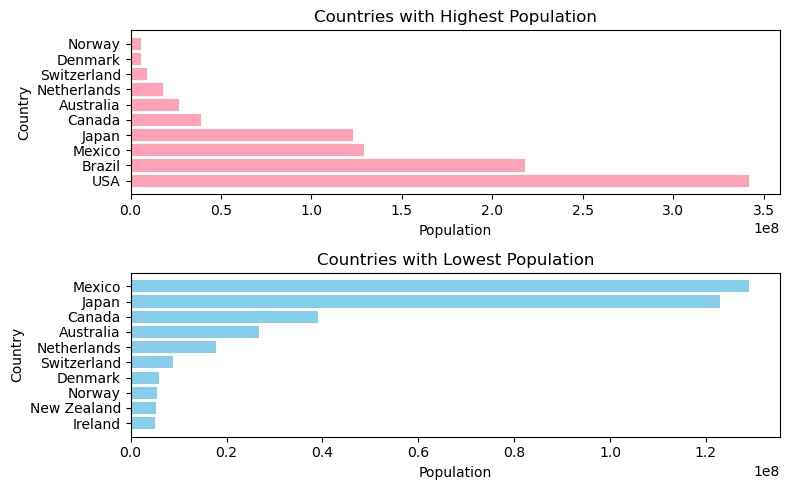

In [174]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

# Plot the highest population countries
ax1.barh(highest_pop['country'], highest_pop['population'], color='#FCA3B7')
ax1.set_title('Countries with Highest Population')
ax1.set_xlabel('Population')
ax1.set_ylabel('Country')

# Plot the lowest population countries
ax2.barh(lowest_pop['country'], lowest_pop['population'], color='skyblue')
ax2.set_title('Countries with Lowest Population')
ax2.set_xlabel('Population')
ax2.set_ylabel('Country')

# If you don't do this then your charts overlap!
plt.tight_layout()

# Show plot
plt.show()

**Observations:**

Of the countries under consideration for expansion, the top 5 countries by population in comparison to the United states are:

- Brazil
- Mexico
- Japan 
- Canada
- Australia

In [175]:
# top 5 countries with highest & lowest gdp
# Only printing highest. I don't need lowest but will use it for graphs
top_5_gdp = merged.sort_values(by="gdp", ascending=False).head(5)
lowest_gdp = merged.sort_values(by="gdp", ascending=True).head(5)

print("\nHighest GDP:")
print(top_5_gdp[["country", "gdp"]])


Highest GDP:
       country         gdp
7       Mexico 9230000.000
1       Brazil 8490000.000
9       Norway   86700.000
3  Switzerland   86500.000
5      Ireland   73600.000


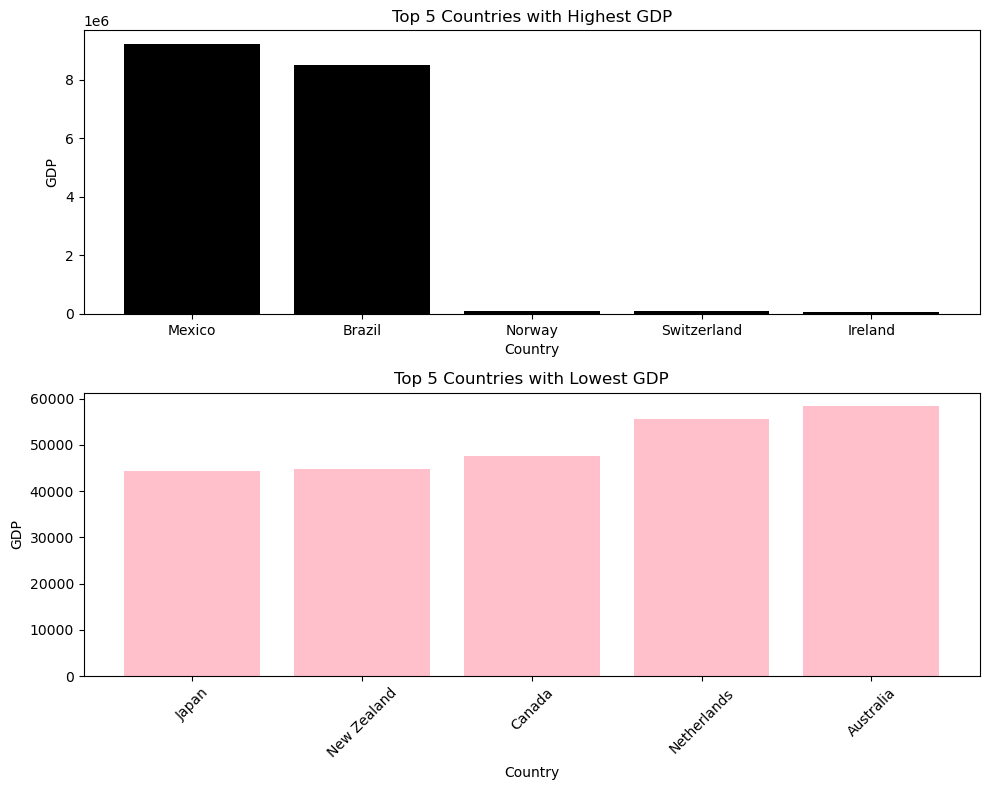

In [176]:
# Define the top 5 countries with the highest and lowest GDP
# assign them to top_countries and bottom_countries
top_countries = top_5_gdp.head(5)
bottom_countries = lowest_gdp.head(5)

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the top 5 countries with highest GDP
ax1.bar(top_countries['country'], top_countries['gdp'], color='black')
ax1.set_title('Top 5 Countries with Highest GDP')
ax1.set_xlabel('Country')
ax1.set_ylabel('GDP')

# Plot the top 3 countries with lowest GDP
ax2.bar(bottom_countries['country'], bottom_countries['gdp'], color='pink')
ax2.set_title('Top 5 Countries with Lowest GDP')
ax2.set_xlabel('Country')
ax2.set_ylabel('GDP')

# Rotate the x-axis labels to keep country names from overlapping
plt.xticks(rotation=45)

# Adjust layout
# You have to use this to keep the graphs from overlapping
plt.tight_layout()

# Show plot
plt.show()

In [177]:
# GDP with respect to the country population size
# Create a new column that divides GDP by population
merged['gdp_per_capita'] = merged['gdp'] / merged['population']

# Group the data by country and calculate the mean GDP per capita
avg_gdp_per_capita = merged.groupby('country')['gdp_per_capita'].mean()

# Print the results
print(avg_gdp_per_capita)

country
Australia     0.002
Brazil        0.039
Canada        0.001
Denmark       0.011
Ireland       0.014
Japan         0.000
Mexico        0.072
Netherlands   0.003
New Zealand   0.009
Norway        0.016
Switzerland   0.010
USA           0.000
Name: gdp_per_capita, dtype: float64


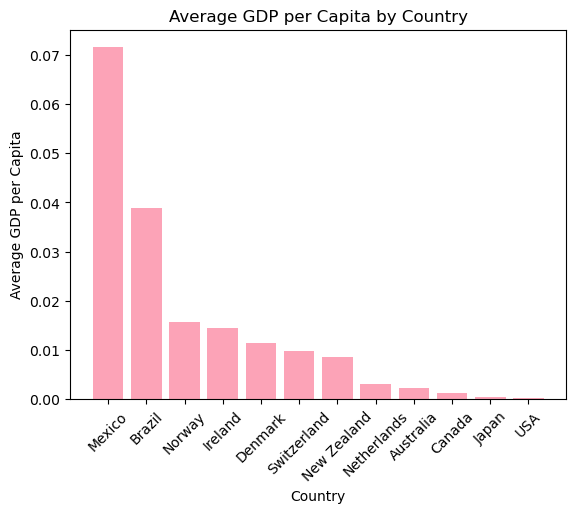

In [178]:
# Average GDP per country population size
# Sort the data by average GDP per capita in descending order
sorted_gdp_per_capita = avg_gdp_per_capita.sort_values(ascending=False)

# Create a bar chart
plt.bar(sorted_gdp_per_capita.index, sorted_gdp_per_capita.values, color = '#FCA3B7')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average GDP per Capita')
plt.title('Average GDP per Capita by Country')

# Rotate the x-axis labels to keep country names from overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Observations:**

Of the countries under consideration for expansion, the top 5 countries by GDP in comparison to the United states are:

- Mexico
- Brazil
- Norway 
- Switzerland
- Ireland

In [179]:
# Which countries have had the highest population growth?
highest_pop_growth = merged.sort_values(by="population", ascending=False).head(5)

print("\nCountries with the highest population growth:")
print(highest_pop_growth[["country", "population"]])

# Which countries have had the lowest population growth?
lowest_pop_growth = merged.sort_values(by="population", ascending=True).head(5)

print("\nCountries with the lowest population growth:")
print(lowest_pop_growth[["country", "population"]])


Countries with the highest population growth:
   country    population
11     USA 342000000.000
1   Brazil 218000000.000
7   Mexico 129000000.000
6    Japan 123000000.000
2   Canada  39100000.000

Countries with the lowest population growth:
        country  population
5       Ireland 5090000.000
10  New Zealand 5270000.000
9        Norway 5510000.000
4       Denmark 5940000.000
3   Switzerland 8850000.000


### Sugar comparative analysis

In [180]:
# Compare countries to their daily sugar intake
merged.groupby(['country', 'sugar']).size().reset_index(name='count').sort_values('sugar', ascending=False)

,country,sugar,count
2,Canada,250.000,1
4,Ireland,228.000,1
11,USA,176.000,1
0,Australia,158.000,1
8,New Zealand,157.000,1
3,Denmark,154.000,1
10,Switzerland,133.000,1
6,Mexico,128.000,1
1,Brazil,117.000,1
9,Norway,115.000,1


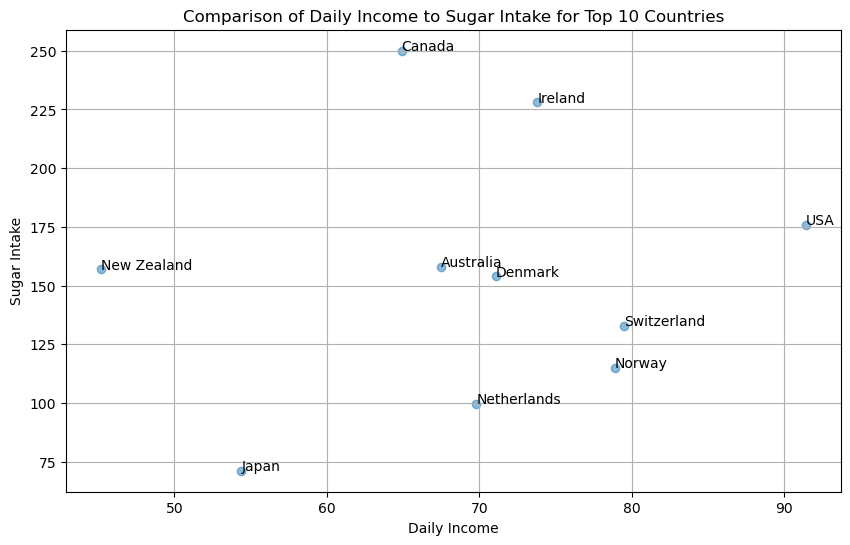

In [181]:
# Show sugar intake and daily income

# Sort the DataFrame by daily income
merged_sorted = merged.sort_values(by='income', ascending=False)

# Select the top 5 countries
top_10_countries = merged_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(top_10_countries['income'], top_10_countries['sugar'], alpha=0.5)

# Add labels and title
plt.xlabel('Daily Income')
plt.ylabel('Sugar Intake')
plt.title('Comparison of Daily Income to Sugar Intake for Top 10 Countries')

# Add grid
plt.grid(True)

# Add country labels
for i, txt in enumerate(top_10_countries['country']):
    plt.annotate(txt, (top_10_countries['income'].iloc[i], top_10_countries['sugar'].iloc[i]))

plt.show()

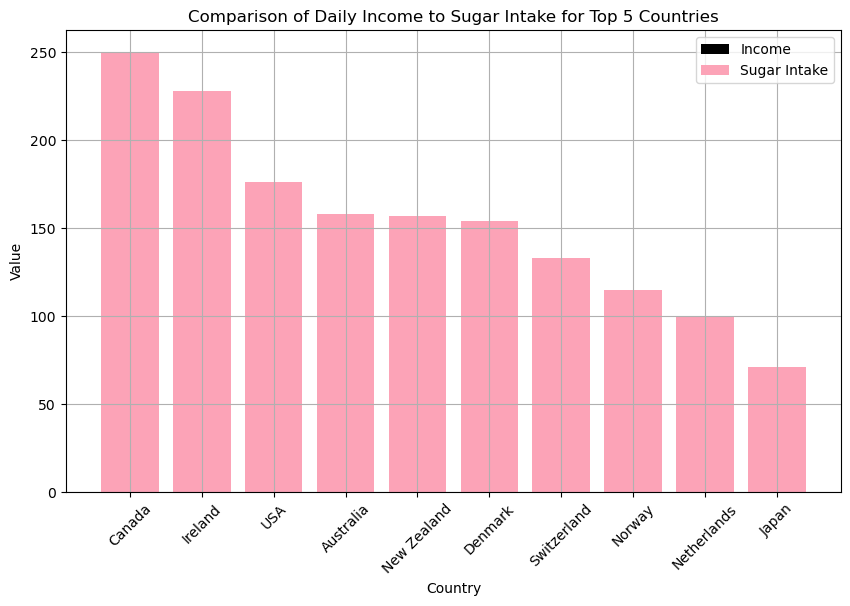

In [182]:
# Another better to visualize sugar intake and daily income
# Sort the DataFrame by daily income
merged_sorted = merged.sort_values(by='income', ascending=False)

# Select the top 10 countries
top_10_countries = merged_sorted.head(10)

# Sort the DataFrame by sugar intake
top_10_countries_sorted = top_10_countries.sort_values(by='sugar', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot
plt.bar(top_10_countries_sorted['country'], top_10_countries_sorted['income'], label='Income', color='black')
plt.bar(top_10_countries_sorted['country'], top_10_countries_sorted['sugar'], label='Sugar Intake', color='#FCA3B7')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Comparison of Daily Income to Sugar Intake for Top 5 Countries')

# Add grid
plt.grid(True)

# Better readability as the names don't overlap
plt.xticks(rotation=45)

# Add legend
# Not sure why the legend shows income blue
plt.legend()

plt.show()

In [183]:
from tabulate import tabulate
# My previous output was boring. I got this prettier chart from Chat gpt
# Assuming you have 'merged' DataFrame containing 'country' and 'sugar' columns

# Group by country and calculate the mean sugar intake
sugar_intake2 = merged.groupby('country')['sugar'].mean().reset_index()

# Print the formatted DataFrame using tabulate
print(tabulate(sugar_intake2, headers='keys', tablefmt='pretty'))

+----+-------------+-------+
|    |   country   | sugar |
+----+-------------+-------+
| 0  |  Australia  | 158.0 |
| 1  |   Brazil    | 117.0 |
| 2  |   Canada    | 250.0 |
| 3  |   Denmark   | 154.0 |
| 4  |   Ireland   | 228.0 |
| 5  |    Japan    | 71.2  |
| 6  |   Mexico    | 128.0 |
| 7  | Netherlands | 99.7  |
| 8  | New Zealand | 157.0 |
| 9  |   Norway    | 115.0 |
| 10 | Switzerland | 133.0 |
| 11 |     USA     | 176.0 |
+----+-------------+-------+


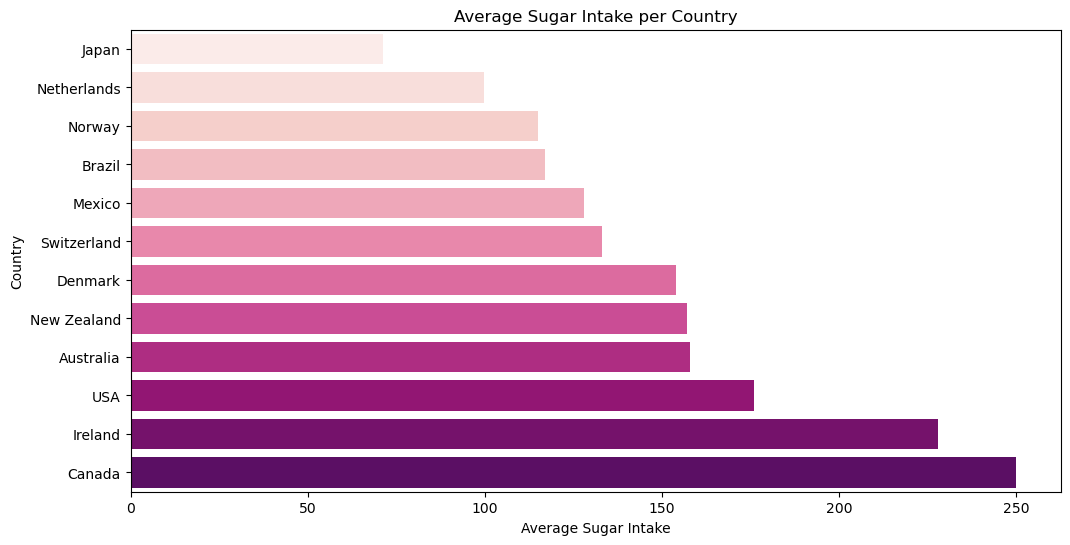

In [184]:
# Sort the data by sugar intake to make it look better
sugar_intake = sugar_intake2.sort_values(by='sugar', ascending=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='sugar', y='country', data=sugar_intake, palette='RdPu')
plt.xlabel('Average Sugar Intake')
plt.ylabel('Country')
plt.title('Average Sugar Intake per Country')
plt.show()

## Conclusions and Recommendations

**Observations:**

Of the countries under consideration for expansion, the top 5 countries by Sugar Intake in comparison to the United states are:

- Canada
- Ireland
- Australia
- New Zealand
- Denmark

These countries are also the top 5 for daily income values. Interestingly enough, the daily sugar intake per person didn't increase as the population increased.

### Executive Summary
My process in approaching this project was to find data relevant to a global expansion. Crumbl Cookies is a family owned business in the US. In this hypothetical project they need suggestions as to which countries offer the best likelihood for success. I chose to limit the scope of the project to 14 countries and use 2024 data from the Gapminder website.

 I individually analyzed each dataset, them merged them for more comprehensive analysis. Initially, my hypothesis was that GDP and population would be the strongest indicators for country selection. Though, they ended up being relatively poor predictors. The top countries with respect to Gross Domestic Product and population were Brazil and Mexico. However, they both fell into the 8th and 9th place spots out of the 14 countries for daily income and daily sugar intake. As a dessert company, both of those indicators are critical for success.

 My conclusion is the top three countries most likely to yield success are Canada, Ireland and Australia with Canada as the clear winner.

 My recommendation is to chose Canada as the first country for expansion and do further analysis to determine which metropolitan area would be best.
